In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.font_manager as fm
import mglearn
font_name = fm.FontProperties(fname="C:/Windows/Fonts/malgun.ttf").get_name()
plt.rc('font', family=font_name)

mpl.rcParams["axes.unicode_minus"] = False
from sklearn.model_selection import train_test_split

# SVM(Support Vector Machine)

- 많은 양의 데이터가 필요없다.
- 커널트릭을 사용해서 저차원에서 고차원으로 만들어 잘 분류할 수 있다.

- 단점 
    - 스케일링에 매우 민감

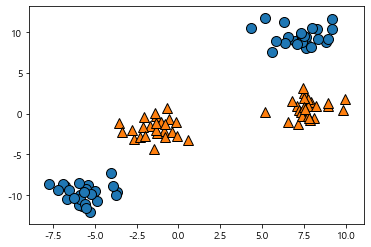

In [7]:
from sklearn.datasets import make_blobs

X, y = make_blobs(centers=4, random_state=8)

# 두가지로 분류하기 위해 
y = y % 2
mglearn.discrete_scatter(X[:,0],X[:,1], y)

C:\Users\USER\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


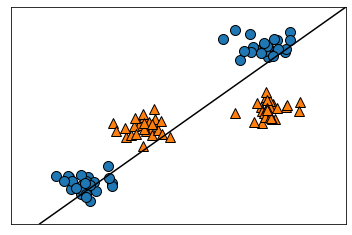

In [8]:
from sklearn.svm import LinearSVC

linear_svm = LinearSVC().fit(X, y)
mglearn.discrete_scatter(X[:,0], X[:,1], y)
mglearn.plots.plot_2d_separator(linear_svm,X)

Text(0.5, 0, '특성1 ** 2')

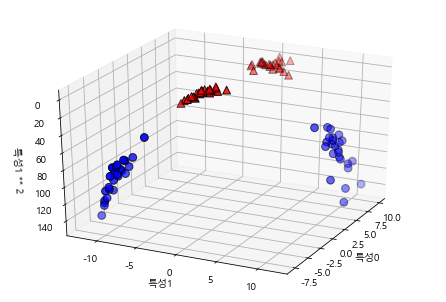

In [9]:
X_new = np.hstack([X, X[:, 1:] ** 2])

from mpl_toolkits.mplot3d import Axes3D, axes3d
figure = plt.figure()
# 3차원 그래프
ax = Axes3D(figure, elev=-152, azim=-26)

mask = y == 0
ax.scatter(X_new[mask, 0], X_new[mask, 1], X_new[mask, 2], c='b', cmap=mglearn.cm2, s=60,  edgecolor='k')
ax.scatter(X_new[~mask, 0], X_new[~mask, 1], X_new[~mask, 2], c='r', marker='^', 
           cmap=mglearn.cm2, s=60, edgecolor='k')
ax.set_xlabel("특성0")
ax.set_ylabel("특성1")
ax.set_zlabel("특성1 ** 2")

C:\Users\USER\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


Text(0.5, 0, '특성1 ** 2')

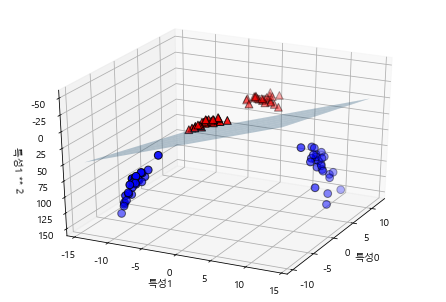

In [10]:
linear_svm_3d = LinearSVC().fit(X_new, y)
coef, intercept = linear_svm_3d.coef_.ravel(), linear_svm_3d.intercept_
# 선형 결정 경계 그리기
figure = plt.figure()
ax = Axes3D(figure, elev=-152, azim=-26)
xx = np.linspace(X_new[:, 0].min() - 2, X_new[:, 0].max() + 2, 50)
yy = np.linspace(X_new[:, 1].min() - 2, X_new[:, 1].max() + 2, 50)

XX, YY = np.meshgrid(xx, yy)
ZZ = (coef[0] * XX + coef[1] * YY + intercept) / -coef[2]
ax.plot_surface(XX, YY, ZZ, rstride=8, cstride=8, alpha=0.3)
ax.scatter(X_new[mask, 0], X_new[mask, 1], X_new[mask, 2], c='b', cmap=mglearn.cm2, s=60,  edgecolor='k')
ax.scatter(X_new[~mask, 0], X_new[~mask, 1], X_new[~mask, 2], c='r', marker='^', 
           cmap=mglearn.cm2, s=60, edgecolor='k')
ax.set_xlabel("특성0")
ax.set_ylabel("특성1")
ax.set_zlabel("특성1 ** 2")

### 파라미터 : cost, gamma

+ cost
    - decition boundary와 마진의 간격을 어느 정도로 할지 결정
    - cost가 작으면 마지은 넓어진다.
    
    
+ gamma
    - 훈련데이터 하나 당 영향을 끼치는 범위를 조절하는 변수
    - gamma가 적을 경우 영향을 끼치는 범위가 넓어진다.

In [4]:
from sklearn.svm import SVC

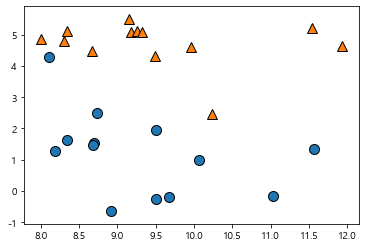

In [12]:
X, y = mglearn.tools.make_handcrafted_dataset()

# 데이터 확인
mglearn.discrete_scatter(X[:,0], X[:,1], y)

In [15]:
# 학습
svm = SVC(kernel="rbf", C=10, gamma=0.1).fit(X, y)

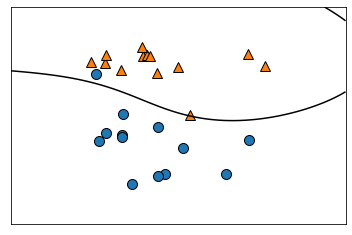

In [16]:
# 선으로 분류
mglearn.discrete_scatter(X[:,0], X[:,1], y)
mglearn.plots.plot_2d_separator(svm, X)

In [18]:
# 서포트 벡터 확인
sv = svm.support_vectors_
# 5의 데이터가 선에 영향을 주고 있다.


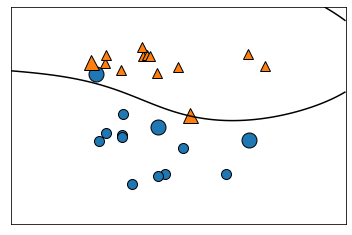

In [20]:
# 다시 그래프 그리기

mglearn.discrete_scatter(X[:,0], X[:,1], y)
mglearn.plots.plot_2d_separator(svm, X)

sv_lables = svm.dual_coef_.ravel() > 0
mglearn.discrete_scatter(sv[:,0], sv[:,1], sv_lables, s=15)
# 큰것이 서포트 벡터이다.

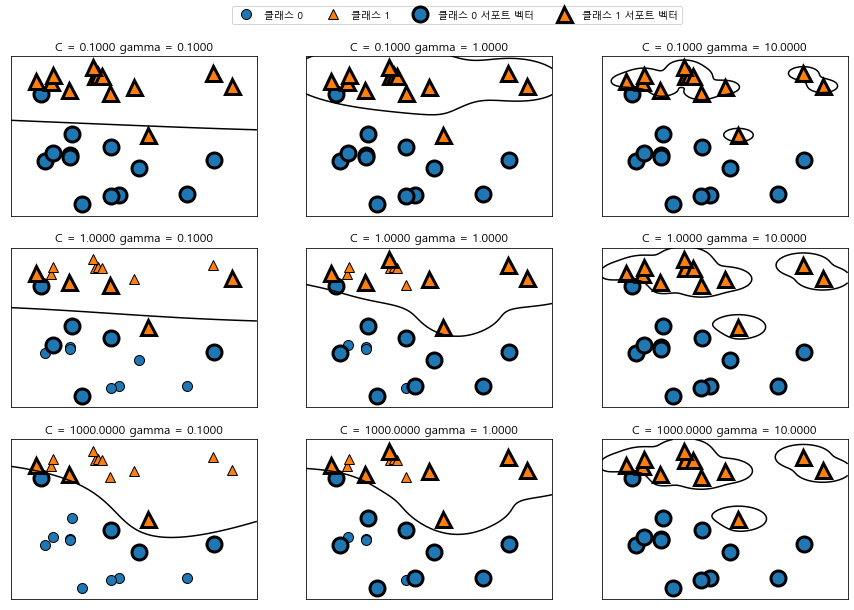

In [21]:
# 복사코드

fig, axes = plt.subplots(3, 3, figsize=(15, 10))
for ax, C in zip(axes, [-1, 0, 3]):
    for a, gamma in zip(ax, range(-1, 2)):
        mglearn.plots.plot_svm(log_C=C, log_gamma=gamma, ax=a)

axes[0, 0].legend(["클래스 0", "클래스 1", "클래스 0 서포트 벡터", "클래스 1 서포트 벡터"],
                 ncol=4, loc=(.9, 1.2))

#### 유방암 데이터셋 활용


In [30]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target,random_state=0)

In [31]:
svm = SVC() # C=1, gamma = 1/ 특성의 개수(X_train.shape[1])
# 학습
svm.fit(X_train,y_train)

SVC()

In [32]:
print("훈련 결과 :", svm.score(X_train, y_train))
print("테스트 결과 :", svm.score(X_test, y_test))
# 과소적합이 의심됨

훈련 결과 : 0.903755868544601
테스트 결과 : 0.9370629370629371


In [37]:
# 만족스러운 결과가 아니기에 전처리로 스케일 조정
# 특성별 최소값
min_on_training = X_train.min(axis=0)
# print(min_on_training)
# 최댓값
max_on_training = X_train.max(axis=0)
# print(max_on_training)

# 특성별 범위
range_on_training = max_on_training - min_on_training
# 다른 방법
# range_on_training = (X_train - min_on_training).max(axis=0)
# range_on_training

# 스케일 조정
X_train_scaled = (X_train-min_on_training) / range_on_training
X_test_scaled = (X_test-min_on_training) / range_on_training


In [38]:
svm2 = SVC().fit(X_train_scaled, y_train)

In [40]:
print("훈련 결과 :", svm2.score(X_train_scaled, y_train))
print("테스트 결과 :", svm2.score(X_test_scaled, y_test))

훈련 결과 : 0.9835680751173709
테스트 결과 : 0.972027972027972


In [43]:
# Cost로 성능 튜닝

svm50 = SVC(C=50).fit(X_train_scaled,y_train)

In [44]:
print("훈련 결과 :", svm50.score(X_train_scaled, y_train))
print("테스트 결과 :", svm50.score(X_test_scaled, y_test))

훈련 결과 : 0.9953051643192489
테스트 결과 : 0.9790209790209791


In [46]:
# Grid Search
from sklearn.model_selection import GridSearchCV


params = [{"kernel": ["rbf"], "gamma": [0.00001, 0.0001, 0.001, 0.1, 1],
          "C":[0.01,0.1, 1, 10,100, 1000]}]

gs_svm = GridSearchCV(SVC(), params, cv=10).fit(X_train_scaled, y_train)

In [48]:
print(gs_svm.best_params_)

{'C': 1, 'gamma': 1, 'kernel': 'rbf'}


In [49]:
svm = SVC(C=1, gamma=1).fit(X_train_scaled, y_train)
print("훈련 결과 :", svm.score(X_train_scaled, y_train))
print("테스트 결과 :", svm.score(X_test_scaled, y_test))
# 기본값이 가장 좋은 결과를 보이고 있다.

훈련 결과 : 0.9835680751173709
테스트 결과 : 0.972027972027972


####  실습 예제1

In [2]:
# 붓꽃 데이터

from sklearn.datasets import load_iris
iris = load_iris()

X = iris.data[:,[2,3]]
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.3,
                                                    random_state=0)

In [8]:
# 학습 시키기
svm_iris = SVC().fit(X_train, y_train)

print("훈련 결과 :", svm_iris.score(X_train, y_train))
print("테스트 결과 :", svm_iris.score(X_test, y_test))

훈련 결과 : 0.9714285714285714
테스트 결과 : 0.9777777777777777


In [11]:
# kernel='linear', or 'rbf'
svm = SVC(kernel='linear', C=1, gamma=1e-6).fit(X_train, y_train)
print("훈련 결과 :", svm_iris.score(X_train, y_train))
print("테스트 결과 :", svm_iris.score(X_test, y_test))

훈련 결과 : 0.9714285714285714
테스트 결과 : 0.9777777777777777


#### 농구 선수의 포지션 예측
- SG : shooting Gard
- C : center
- TRB : 총 리바운드
- BLK : 블락

In [12]:
df = pd.read_csv("../Acorn machine learning/basketball_stat.csv")
df.head()

,Player,Pos,3P,2P,TRB,AST,STL,BLK
0,Alex Abrines,SG,1.4,0.6,1.3,0.6,0.5,0.1
1,Steven Adams,C,0.0,4.7,7.7,1.1,1.1,1.0
2,Alexis Ajinca,C,0.0,2.3,4.5,0.3,0.5,0.6
3,Chris Andersen,C,0.0,0.8,2.6,0.4,0.4,0.6
4,Will Barton,SG,1.5,3.5,4.3,3.4,0.8,0.5


In [13]:
df.Pos.value_counts()

C     50
SG    50
Name: Pos, dtype: int64

C:\Users\USER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


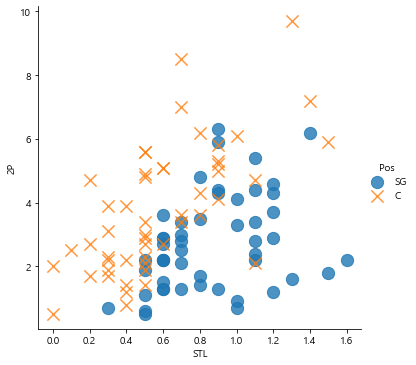

In [16]:
# 불필요한 특성을 구분하기 위한 시각화
# 스틸, 2점슛
# fit_reg=False : 회귀선 안보이기, hue="Pos": 색구분
sns.lmplot("STL", "2P", data=df, fit_reg=False, hue="Pos", 
           markers=["o", "x"], scatter_kws={"s":150})

C:\Users\USER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


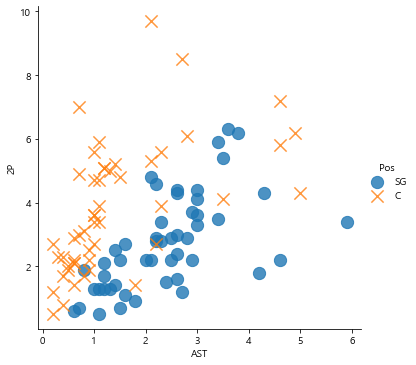

In [17]:
# 어시스트와 2점슛
sns.lmplot("AST", "2P", data=df, fit_reg=False, hue="Pos", 
           markers=["o", "x"], scatter_kws={"s":150})

C:\Users\USER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


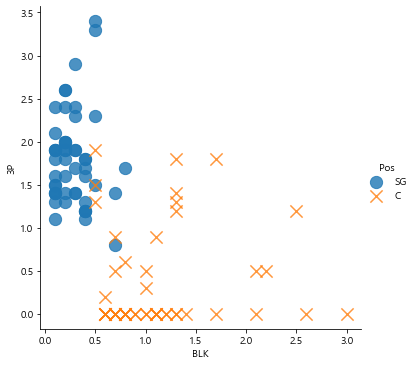

In [18]:
# 블럭킹 3점슛

sns.lmplot("BLK", "3P", data=df, fit_reg=False, hue="Pos", 
           markers=["o", "x"], scatter_kws={"s":150})

C:\Users\USER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


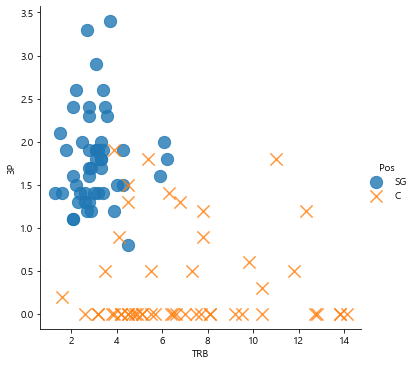

In [19]:
# 리바운드, 3점
sns.lmplot("TRB", "3P", data=df, fit_reg=False, hue="Pos", 
           markers=["o", "x"], scatter_kws={"s":150})

In [21]:
# 불필요한 특성 제거
df.drop(['2P', "AST", "STL"],axis=1,inplace=True)

In [22]:
df.head()

,Player,Pos,3P,TRB,BLK
0,Alex Abrines,SG,1.4,1.3,0.1
1,Steven Adams,C,0.0,7.7,1.0
2,Alexis Ajinca,C,0.0,4.5,0.6
3,Chris Andersen,C,0.0,2.6,0.6
4,Will Barton,SG,1.5,4.3,0.5


In [25]:
# 훈련데이터와 테스트 데이터로 분류
train, test = train_test_split(df, test_size=0.2)

In [26]:
# 데이터를 이진파일로 저장하기 

import pickle

In [27]:

train_data = open("../Acorn machine learning/baskeball_train.pkl", "wb")
pickle.dump(train, train_data) # 훈련용데이터

test_data = open("../Acorn machine learning/baskeball_test.pkl", "wb")
pickle.dump(test, test_data) # 테스트용데이터

train_data.close()
test_data.close()

In [29]:
# 저장 파일 불러오기

with open("../Acorn machine learning/baskeball_train.pkl", "rb") as train_data:
    train = pickle.load(train_data)
    
with open("../Acorn machine learning/baskeball_test.pkl", "rb") as test_data:
    test = pickle.load(test_data)   

In [30]:
test.head()
train.head()

,Player,Pos,3P,TRB,BLK
41,Gary Harris,SG,1.9,3.1,0.1
59,Courtney Lee,SG,1.4,3.4,0.3
8,Patrick Beverley,SG,1.6,5.9,0.4
23,Anthony Davis,C,0.5,11.8,2.2
10,Tarik Black,C,0.0,5.1,0.7


In [32]:
# 최적의 파라미터 찾기 :Grid SearchCV

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

# Pos : y, [2P, TRB, BLK] : X
X_train = train[['3P', 'TRB', 'BLK']]
y_train = train["Pos"]

params = [{"kernel":["rbf", "linear"],
          "gamma":[0.00001,0.0001,0.001,0.01,0.1,1],
          "C":[0.01,0.1,1,10,100,1000]}]

svm = GridSearchCV(SVC(), params, cv=10).fit(X_train, y_train)

In [33]:
# 최적의 파라미터 찾아보기
print(svm.best_params_)

{'C': 1, 'gamma': 1e-05, 'kernel': 'linear'}


In [34]:
X_test = test[['3P', 'TRB', 'BLK']]
y_test = test[["Pos"]]

pred = svm.predict(X_test)

In [35]:
print("정확도 : ", accuracy_score(y_test, pred))
print(classification_report(y_test, pred))

정확도 :  1.0
              precision    recall  f1-score   support

           C       1.00      1.00      1.00         8
          SG       1.00      1.00      1.00        12

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



#### 이미지 내부의 문자 인식
- 180p

In [37]:
# 강사님 복사본
import urllib.request as req
import gzip, os, os.path
savepath = "../Acorn machine learning/mnist"
baseurl = "http://yann.lecun.com/exdb/mnist"
files = ["train-images-idx3-ubyte.gz","train-labels-idx1-ubyte.gz","t10k-images-idx3-ubyte.gz","t10k-labels-idx1-ubyte.gz"]
# 다운로드
if not os.path.exists(savepath): os.mkdir(savepath)
for f in files:
    url = baseurl + "/" + f
    loc = savepath + "/" + f
    print("download:", url)
    if not os.path.exists(loc):
        req.urlretrieve(url, loc)
# GZip 압축 해제
for f in files:
    gz_file = savepath + "/" + f
    raw_file = savepath + "/" + f.replace(".gz", "")
    print("gzip:", f)
    with gzip.open(gz_file, "rb") as fp:
        body = fp.read()
        with open(raw_file, "wb") as w:
            w.write(body)
print("ok")

download: http://yann.lecun.com/exdb/mnist/train-images-idx3-ubyte.gz
download: http://yann.lecun.com/exdb/mnist/train-labels-idx1-ubyte.gz
download: http://yann.lecun.com/exdb/mnist/t10k-images-idx3-ubyte.gz
download: http://yann.lecun.com/exdb/mnist/t10k-labels-idx1-ubyte.gz
gzip: train-images-idx3-ubyte.gz
gzip: train-labels-idx1-ubyte.gz
gzip: t10k-images-idx3-ubyte.gz
gzip: t10k-labels-idx1-ubyte.gz
ok


In [41]:
# 훈련데이터 train-images-idx3 : X, idx1 : y
# 데이터가 이진데이터로 구성되어 있음
# 이진파일을 -->10진수로 변환
# 강상님 복사본
import struct
def to_csv(name, maxdata):
    # 레이블 파일과 이미지 파일 열기
    lbl_f = open("../Acorn machine learning/mnist/"+name+"-labels-idx1-ubyte", "rb")
    img_f = open("../Acorn machine learning/mnist/"+name+"-images-idx3-ubyte", "rb")
    
    csv_f = open("../Acorn machine learning/mnist/"+name+".csv", "w", encoding="utf-8")
    # 헤더 정보 읽기 --- (※1)
    mag, lbl_count = struct.unpack(">II", lbl_f.read(8))
    mag, img_count = struct.unpack(">II", img_f.read(8))
    rows, cols = struct.unpack(">II", img_f.read(8))
    pixels = rows * cols
    # 이미지 데이터를 읽고 CSV로 저장하기 --- (※2)
    res = []
    for idx in range(lbl_count):
        if idx > maxdata: break
        label = struct.unpack("B", lbl_f.read(1))[0]
        bdata = img_f.read(pixels)
        sdata = list(map(lambda n: str(n), bdata))
        csv_f.write(str(label)+",")
        csv_f.write(",".join(sdata)+"\r\n")
        # 잘 저장됐는지 이미지 파일로 저장해서 테스트하기 -- (※3)
        if idx < 10:
            s = "P2 28 28 255\n"
            s += " ".join(sdata)
            iname = "../Acorn machine learning/mnist/{0}-{1}-{2}.pgm".format(name,idx,label)
            with open(iname, "w", encoding="utf-8") as f:
                f.write(s)
    csv_f.close()
    lbl_f.close()
    img_f.close()
# 결과를 파일로 출력하기 --- (※4)
to_csv("train", 10000)
to_csv("t10k", 500)

In [ ]:
"""
포터블 비트맵(Potable Bitmaps)
1. pgm : 한 화소를 1byte로 표현
    - P2, P5
2. pbm : 한 화소를 1bit로 표현
    - P1, P4
3. ppm : 한 화소를 3byte로 표현(R, G, B)
    - P3, P6
"""

In [43]:
from sklearn import model_selection, svm, metrics

def load_csv(fname):
    labels = []
    images = []
    
    with open(fname, "r") as f:
        for line in f:
            cols = line.split(",")
            if len(cols) < 2:
                continue
            
            labels.append(int(cols.pop(0)))
            
            vals = list(map(lambda n:int(n)/256, cols))
            images.append(vals)
    return {"labels":labels, "images":images}

data = load_csv("../Acorn machine learning/mnist/train.csv")
test = load_csv("../Acorn machine learning/mnist/t10k.csv")

In [47]:
print(data["images"][2])
print(data["labels"][2])

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.26171875, 0.90625, 0.15234375, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.2421875, 0.31640625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.46875, 0.703125, 0.1523437

In [49]:
# 학습 시키기
model = SVC().fit(data["images"], data["labels"])

In [50]:
# 예측 
pred = model.predict(test["images"])

In [52]:
# 기본값으로 정확도
print("정확도 :",accuracy_score(test["labels"], pred))
# report 
print(classification_report(test["labels"], pred))

정확도 : 0.9560878243512974
              precision    recall  f1-score   support

           0       0.93      0.98      0.95        42
           1       1.00      1.00      1.00        67
           2       0.98      0.96      0.97        55
           3       0.93      0.91      0.92        46
           4       0.93      0.98      0.96        55
           5       0.92      0.94      0.93        50
           6       0.98      0.93      0.95        43
           7       0.94      0.96      0.95        49
           8       0.93      0.97      0.95        40
           9       1.00      0.91      0.95        54

    accuracy                           0.96       501
   macro avg       0.95      0.95      0.95       501
weighted avg       0.96      0.96      0.96       501



In [55]:
# 임의로 테스트 해보기
pred1 = model.predict([test["images"][300]])
print("예측값",pred1)
# 4라고 예측
# 확인
print("실제값",test["labels"][300])

예측값 [4]
실제값 4


In [56]:
input_form = """
<table>
<td style="border-style: none;">
<div style="border: solid 2px #666; width: 143px; height: 144px;">
<canvas width="140" height="140"></canvas>
</div></td>
<td style="border-style: none;">
<button onclick="clear_value()">Clear</button>
</td>
</table>
"""

javascript = """
<script type="text/Javascript">
    var pixels = [];
    for (var i = 0; i < 28*28; i++) pixels[i] = 0
    var click = 0;
    var canvas = document.querySelector("canvas");
    canvas.addEventListener("mousemove", function(e){
        if (e.buttons == 1) {
            click = 1;
            canvas.getContext("2d").fillStyle = "rgb(0,0,0)";
            canvas.getContext("2d").fillRect(e.offsetX, e.offsetY, 8, 8);
            x = Math.floor(e.offsetY * 0.2)
            y = Math.floor(e.offsetX * 0.2) + 1
            for (var dy = 0; dy < 2; dy++){
                for (var dx = 0; dx < 2; dx++){
                    if ((x + dx < 28) && (y + dy < 28)){
                        pixels[(y+dy)+(x+dx)*28] = 1
                    }
                }
            }
        } else {
            if (click == 1) set_value()
            click = 0;
        }
    });
    
    function set_value(){
        var result = ""
        for (var i = 0; i < 28*28; i++) result += pixels[i] + ","
        var kernel = IPython.notebook.kernel;
        kernel.execute("image = [" + result + "]");
    }
    
    function clear_value(){
        canvas.getContext("2d").fillStyle = "rgb(255,255,255)";
        canvas.getContext("2d").fillRect(0, 0, 140, 140);
        for (var i = 0; i < 28*28; i++) pixels[i] = 0
    }
</script>
"""

# canvas :네모창을 의미한다.


In [58]:
# 마우스로 숫자 입력창 만들기
from IPython.display import HTML
HTML(input_form + javascript)
# 마우스로 숫자 입력창 만들기

In [62]:
print(image)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 

In [63]:
pred2 = model.predict([image])
pred2

array([0])